# **Overview**

### Holidays are upon us, and whatever the current circumstances, gifts of any form hopefully helps us feel better. This looks at the shopping trends, focusing mainly on the various factors those can influence the purchase amounts and consequently, the incomes.

### Contents:

1. **Import Required Libraries [1]**
2. **Load the Datasets [2]**
3. **Perform Exploratory Data Anlysis [3-54]**
4. **Clean the Data**
5. **Visualize Data[55-65]**
6. **Key Insights**

Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype

import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        
palette = 'Spectral'
sns.set_palette(palette = palette)

/kaggle/input/consumer-behavior-and-shopping-habits-dataset/shopping_behavior_updated.csv
/kaggle/input/consumer-behavior-and-shopping-habits-dataset/shopping_trends.csv


Load the DatasetsLoad the Datasets

We had added the above dataset from Kaggle for analysis. Now let's read it into a dataframe.

In [2]:
shopping_behavior = pd.read_csv('/kaggle/input/consumer-behavior-and-shopping-habits-dataset/shopping_behavior_updated.csv')

shopping_behavior.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


Perform Exploratory Data AnlysisPerform Exploratory Data Anlysis

In [3]:
shopping_behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [4]:
shopping_behavior.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


Let's check for duplicate values

In [5]:
shopping_behavior.duplicated().sum()

0

Good, there seems to be no duplicate values.

Let's also look if they are any null values

In [6]:
shopping_behavior.isnull().values.any()

False

Good, there are no null values as well. Otherwise we will need to handle them. Now lets move on.

Next we will typical wish to check out unique values / catgories of the key attributes we are interested in.

<Axes: xlabel='Category'>

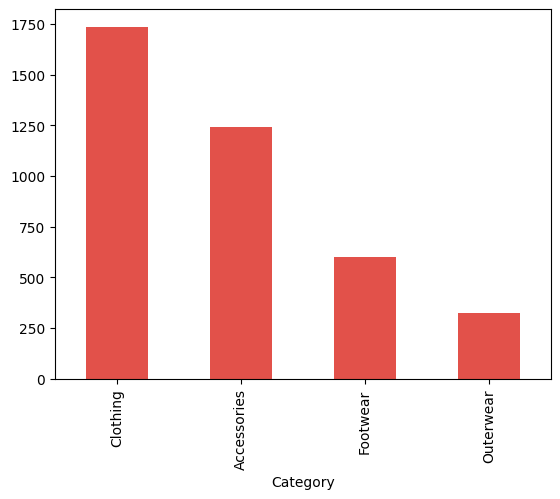

In [7]:
shopping_behavior['Category'].value_counts().plot(kind='bar')

<Axes: xlabel='Season'>

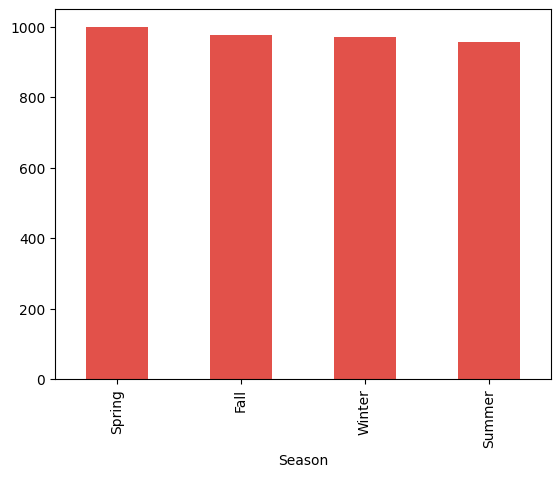

In [8]:
shopping_behavior['Season'].value_counts().plot(kind='bar')

<Axes: xlabel='Payment Method'>

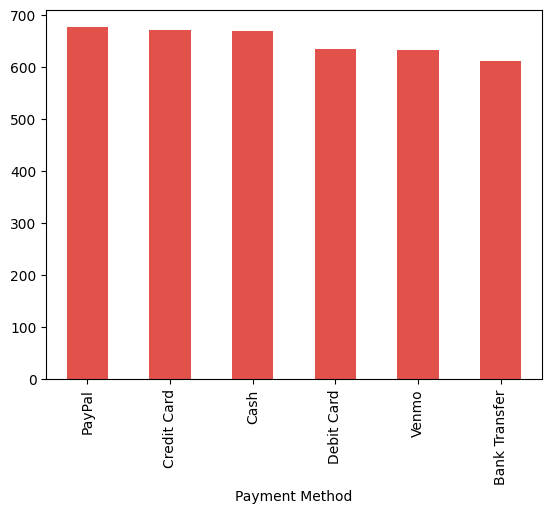

In [9]:
shopping_behavior['Payment Method'].value_counts().plot(kind='bar')

Let's group the above into categories for our analysis

<Axes: xlabel='Payment Category'>

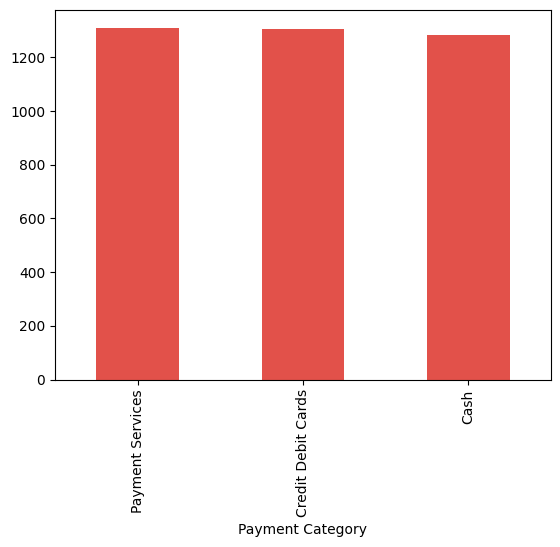

In [10]:
shopping_behavior['Payment Category'] = ''
shopping_behavior.loc[shopping_behavior['Payment Method'].isin(['Credit Card', 'Debit Card'])   ,'Payment Category'] = 'Credit Debit Cards'
shopping_behavior.loc[shopping_behavior['Payment Method'].isin(['PayPal', 'Venmo'])   ,'Payment Category'] = 'Payment Services'
shopping_behavior.loc[shopping_behavior['Payment Method'].isin(['Cash', 'Bank Transfer'])   ,'Payment Category'] = 'Cash'

shopping_behavior['Payment Category'].value_counts().plot(kind='bar')

We can conclude the payment methods are evenly distributed across the dataset.

<Axes: xlabel='Shipping Type'>

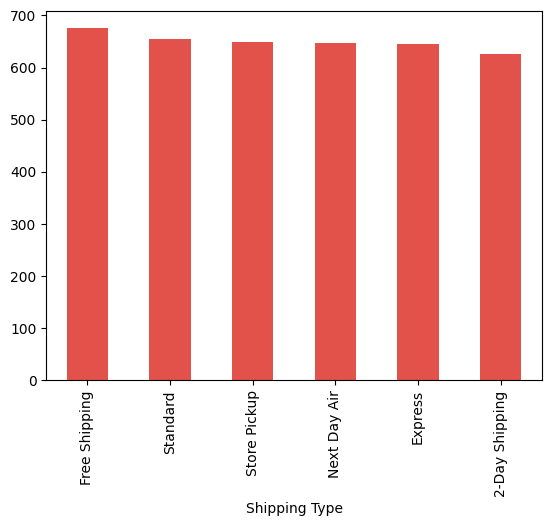

In [11]:
shopping_behavior['Shipping Type'].value_counts().plot(kind='bar')

Does the season affect the shopping type?

<Axes: xlabel='Season'>

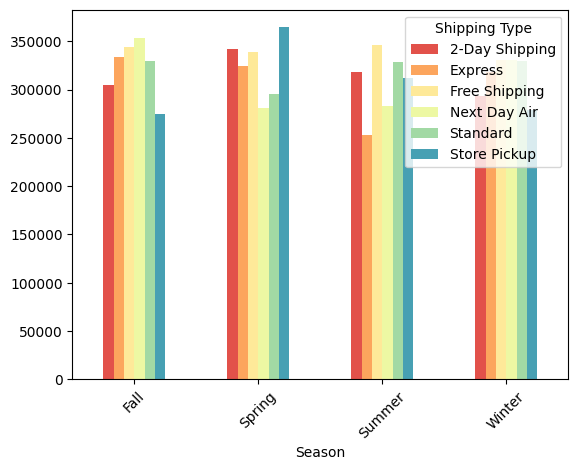

In [12]:
shopping_behavior.groupby(['Season', 'Shipping Type'])['Customer ID'].sum().unstack(1).plot.bar(rot=45)

This looks better but it's messy. We will need to order both the Seasons and Shipping Type for a better picture.

In this case, they are both categoricals so the default sorting is alphabetically. To order them to aid in our analysis, we will need to do the following:

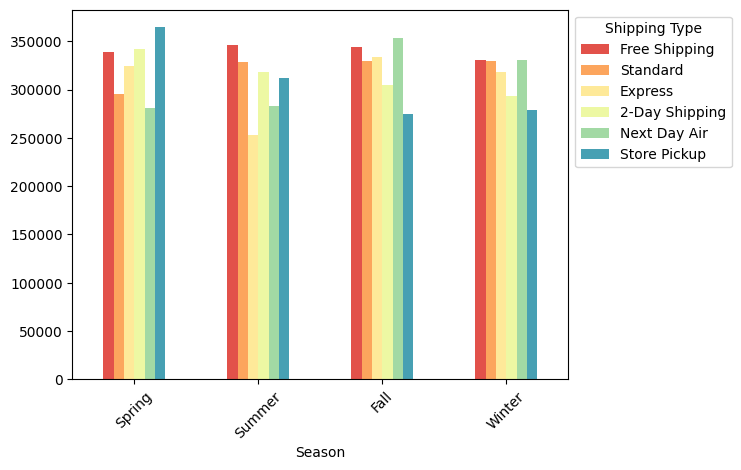

In [13]:
season = CategoricalDtype(['Spring', 'Summer', 'Fall', 'Winter'], ordered=True)
shopping_behavior['Season'] = shopping_behavior['Season'].astype(season)

shipping_type = CategoricalDtype(['Free Shipping', 'Standard', 'Express', 
                                  '2-Day Shipping', 'Next Day Air',
                                  'Store Pickup'], ordered=True)
shopping_behavior['Shipping Type'] = shopping_behavior['Shipping Type'].astype(shipping_type)

ax = shopping_behavior.groupby(['Season', 'Shipping Type'])['Customer ID'].sum().unstack(1).plot.bar(rot=45)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


Much better.

Let's also dive into a few other interesting attributes to see if we can uncover anymore patterns.

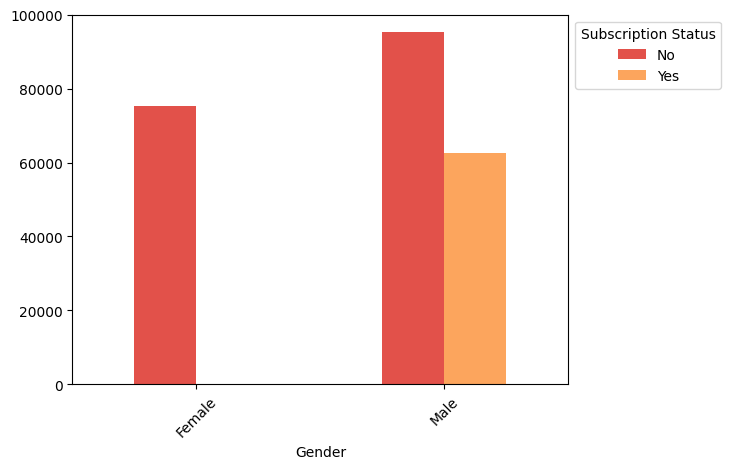

In [14]:
ax = shopping_behavior.groupby(['Gender', 'Subscription Status'])['Purchase Amount (USD)'].sum().unstack(1).plot.bar(rot=45)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

This is actually interesting. I wasn't quite expecting this result :)

Let's dig more into this similar issue to uncover if there are any accompanying trends

In [15]:
## discount and coupon codes
shopping_behavior['Discount Applied'].value_counts()

Discount Applied
No     2223
Yes    1677
Name: count, dtype: int64

In [16]:
shopping_behavior['Promo Code Used'].value_counts()

Promo Code Used
No     2223
Yes    1677
Name: count, dtype: int64

In [17]:
shopping_behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Customer ID             3900 non-null   int64   
 1   Age                     3900 non-null   int64   
 2   Gender                  3900 non-null   object  
 3   Item Purchased          3900 non-null   object  
 4   Category                3900 non-null   object  
 5   Purchase Amount (USD)   3900 non-null   int64   
 6   Location                3900 non-null   object  
 7   Size                    3900 non-null   object  
 8   Color                   3900 non-null   object  
 9   Season                  3900 non-null   category
 10  Review Rating           3900 non-null   float64 
 11  Subscription Status     3900 non-null   object  
 12  Shipping Type           3900 non-null   category
 13  Discount Applied        3900 non-null   object  
 14  Promo Code Used         

In [18]:
shopping_behavior['Paid Full Retail Price'] = 'Yes'

shopping_behavior.loc[(shopping_behavior['Discount Applied']=='Yes')| (shopping_behavior['Promo Code Used']=='Yes'),'Paid Full Retail Price'] = 'No'

shopping_behavior['Paid Full Retail Price'].value_counts()

Paid Full Retail Price
Yes    2223
No     1677
Name: count, dtype: int64

In this case, Discount Applied and Promo Code Used refer to the same thing but they may not. We may choose to perform some logic which I have done in the above to be scalable. Otherwise to simplify things, we may wish to drop 1 redundant column.  It really depends on the context and dataset.

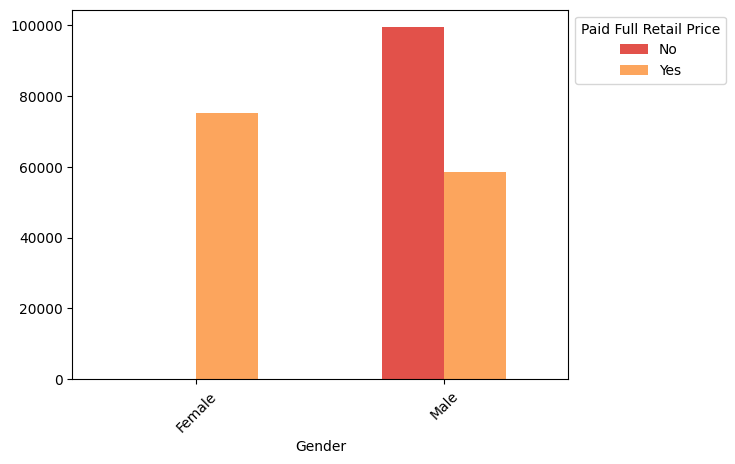

In [19]:
ax = shopping_behavior.groupby(['Gender', 'Paid Full Retail Price'])['Purchase Amount (USD)'].sum().unstack(1).plot.bar(rot=45)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

Wow! The results are now reversed! :)